In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos = pd.read_csv ('dow_jones_index.csv')


columnas = ['accion', 'fecha', 'precio']

df= pd.read_csv ('dow_jones_index.csv',
                usecols=[1, 2, 6],
                header=0,
                names=columnas,
                parse_dates=['fecha'],
                converters = {'precio':
                              lambda x:float(x.replace('$',''))} 
                )

#df

In [4]:
#df.fecha.dt.year.value_counts() #se obtiene una serie de datos que contiene la info del año para cada fila. ademas, se cuentan cuantas veces se repite cada valor
#df.fecha.dt.month.value_counts() #df.fecha= serie de datos. serie.dt.month otra serie de datos. serie.value_counts() cuenta sobre la serie
df.fecha.dt.month_name().value_counts()

April       150
January     120
February    120
March       120
May         120
June        120
Name: fecha, dtype: int64

In [5]:
df ['mes'] = df.fecha.dt.month_name()
filtro1= df['mes'] == 'April'
filtro2= df['mes'] == 'May'

#se agrupan las filas correspondiente al mes de abril o mayo, por tipo de accion y se cuentan los elementos obtenidos
df[filtro1].groupby('accion')['mes'].value_counts()
df[filtro2].groupby('accion')['fecha'].value_counts() # cuando uno agrupa, hay que seleccionar que columnas se quiere ver
#df[filtro].groupby('accion') es un objeto de la case "groupby", pero se comporta parecido a un dataframe

accion  fecha     
AA      2011-05-06    1
        2011-05-13    1
        2011-05-20    1
        2011-05-27    1
AXP     2011-05-06    1
                     ..
WMT     2011-05-27    1
XOM     2011-05-06    1
        2011-05-13    1
        2011-05-20    1
        2011-05-27    1
Name: fecha, Length: 120, dtype: int64

In [6]:
df.groupby('accion').agg({'precio':[np.mean, np.std]})
df.head()

#se agrupa por accion al igual que antes
#agg permite aplicar operaciones sobre datos agrupados, en este caso, promedio y desvio standard del precio
#agg, recibe un dic como argumento. aqui basicamente dice que sobre el precio calcule prom y std para cada grupo de acciones


,accion,fecha,precio,mes
0,AA,2011-01-07,16.42,January
1,AA,2011-01-14,15.97,January
2,AA,2011-01-21,15.79,January
3,AA,2011-01-28,16.13,January
4,AA,2011-02-04,17.14,February


In [7]:
df.groupby('accion').agg({'precio':[np.mean, np.std]}).sort_values([('precio','mean')],ascending=False)
df.head()
#precio y mean son como las categorias jerarquicas que se utilizan para acomodar los datos, mean esta dentro de precio


,accion,fecha,precio,mes
0,AA,2011-01-07,16.42,January
1,AA,2011-01-14,15.97,January
2,AA,2011-01-21,15.79,January
3,AA,2011-01-28,16.13,January
4,AA,2011-02-04,17.14,February


In [26]:
df2= df.pivot_table(index='fecha',
                   columns= 'accion',
                   values='precio')
df2#.head()

accion,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
fecha,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


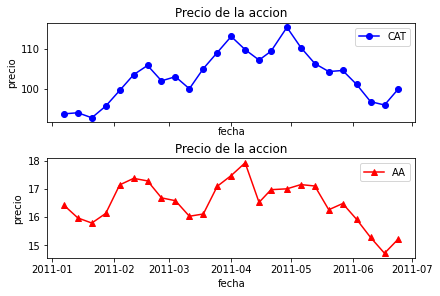

In [9]:
fig,(pan1,pan2) = plt.subplots(2,1, sharex=True, constrained_layout=True)

pan1.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

pan2.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA')

for pan in fig.get_axes():
    pan.set(xlabel= 'fecha',
           ylabel= 'precio',
           title='Precio de la accion')
    
pan1.legend()
pan2.legend()

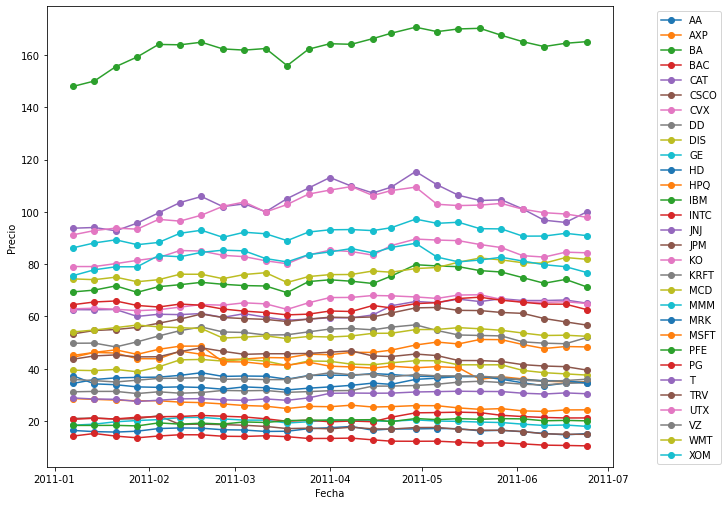

In [57]:
from cProfile import label


fig,pan = plt.subplots( figsize=(10,7), constrained_layout=True)

pan.plot(df2,
         marker= 'o',
         linestyle='solid',
         label=df2.columns
         )

pan.set_ylabel('Precio')
pan.set_xlabel('Fecha')
plt.legend(df2.columns, loc='best', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

plt.show()

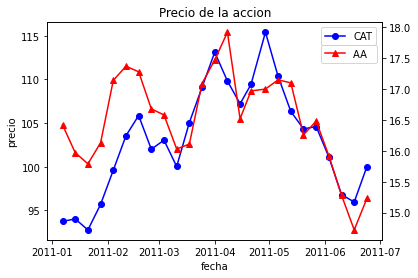

In [10]:
fig, pan1 = plt.subplots()

pan2=pan1.twinx()

pan1.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

pan2.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA  ')


pan1.set(xlabel= 'fecha',
        ylabel= 'precio',
        title='Precio de la accion')

pan1.legend(loc='upper left', bbox_to_anchor=(0.803, 1))
pan2.legend(loc='best', bbox_to_anchor=(1, 0.92))

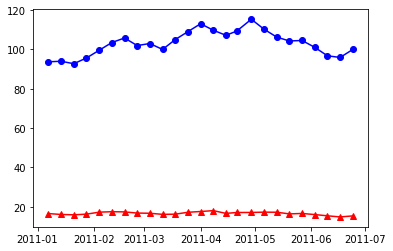

In [11]:
plt.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

plt.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA  ')

plt.show()

In [17]:
 #matriz de correlacion, >0 --> si sube A, sube B ... <o, si sube A, baja B
correlation=df2.corr()#.loc['CAT'] #serie con las correlaciones de la accion CAT
# mat_corr_pos = df2.corr().loc['CAT'][df2.corr().loc['CAT']>0.8].sort_values(ascending=False)
# mat_corr_pos
correlation.head()

accion,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
accion,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195


<AxesSubplot:xlabel='accion', ylabel='accion'>

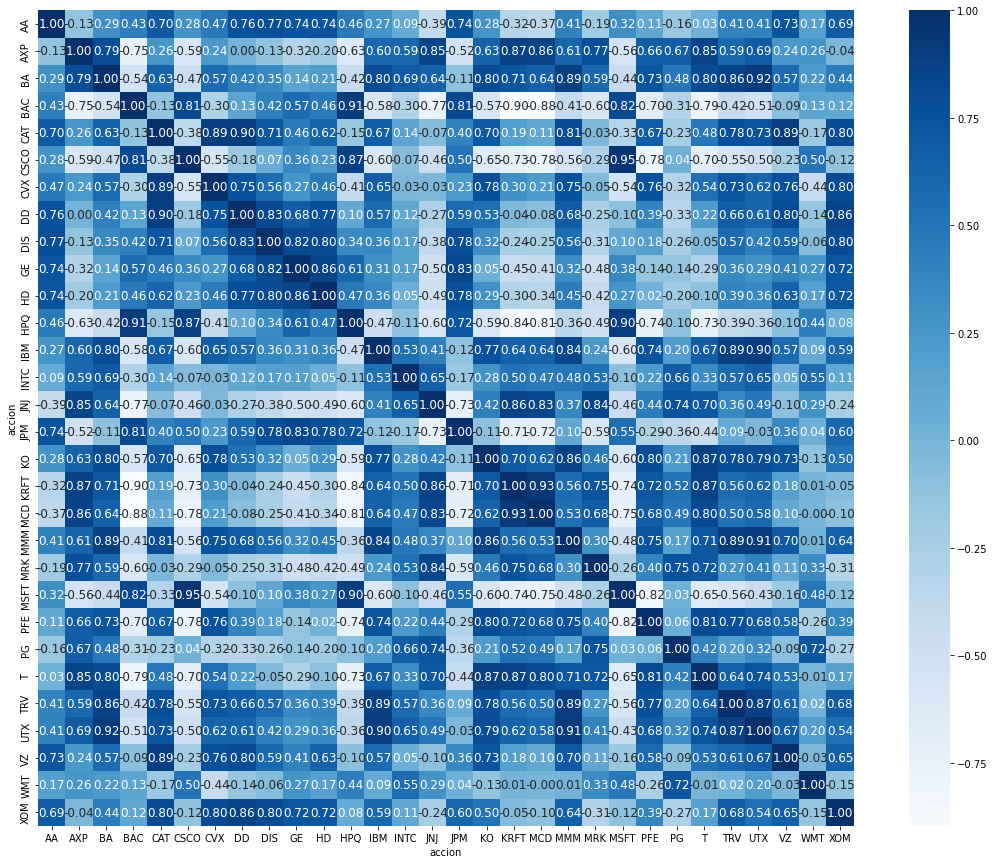

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            xticklabels= correlation.columns, yticklabels= correlation.columns,cmap= 'Blues')